In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 1. Interpretacja modeli: metody model-agnostic

In [2]:
from sklearn.datasets import load_boston

In [3]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
X = pd.DataFrame(load_boston().data,
                 columns=load_boston().feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
y = load_boston().target
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
from sklearn.ensemble import RandomForestRegressor

In [9]:
reg_rf = RandomForestRegressor(n_estimators=100)
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [10]:
y_pred = reg_rf.predict(X_test)

In [11]:
mse = np.mean((y_pred - y_test)**2)
mse

10.253833686274506

In [12]:
rmse = mse ** 0.5
rmse

3.2021607839511286

In [13]:
y_pred

array([25.645, 23.057, 21.463, 11.521, 32.73 , 23.949, 15.304, 31.661,
       21.356, 21.394, 46.753, 34.246, 32.13 , 15.486, 25.28 , 20.038,
       10.844, 41.587, 11.655, 19.316, 32.986, 34.85 , 15.224, 19.292,
       18.892, 23.937, 44.14 , 19.471,  8.625, 26.57 , 21.644, 22.987,
       12.976, 18.448, 18.841, 19.96 , 30.411, 19.711, 21.052, 14.724,
       14.108, 33.522, 13.413, 18.699, 23.682, 23.906, 17.868, 21.527,
       26.706, 31.204, 15.755, 20.805, 26.448, 22.09 , 13.49 ,  9.398,
       42.123, 24.544, 23.618, 12.027, 14.688, 22.399, 15.163, 12.703,
       19.24 , 20.794, 19.548, 20.904, 14.202, 22.188, 26.738, 15.08 ,
       32.386, 15.805, 19.847, 20.465, 23.867, 43.328, 28.062, 19.808,
       43.441, 13.679, 25.412, 22.241, 21.14 , 22.661, 32.514, 18.067,
       28.87 , 32.71 , 20.866, 19.708, 24.861, 22.332, 14.517, 29.502,
       20.46 , 41.633, 20.595, 22.03 , 21.786, 22.691])

## 1.1. PDP - Partial Dependence Plot 

https://christophm.github.io/interpretable-ml-book/pdp.html

#### Zadanie

Zaimplementuj swoją funkcję do określania PD Plots.

1. Pozyskaj nauczony model na którym będziesz przeprowadzał predykcje oraz numer/nazwę zmiennej V, dla której będzie wyliczany PDP.
2. Zbuduj s-elementową siatkę wartości dla zmiennej, którą badasz. 
2. Dla każdej próbki w zbiorze (lub dla n wylosowanych spośród wszystkich próbek):

    2.1. Zamień wartość zmiennej V na przygotowaną siatkę, tworząc tym samym s póbek, różniących się jedynie wartością zmiennej V. 
    
    2.2. Wykonaj predykcję dla każdej próbki, uzyskując s-elementowy wektor y_pred.
    
    2.3. Zapisz wyniki predykcji.
    
3. Oblicz wartość średnią predykcji dla każdej wartości zmiennej V z s-elementowej siatki.

In [14]:
from sklearn.inspection import plot_partial_dependence

c:\users\basia\appdata\local\programs\python\python38\lib\site-packages\sklearn\inspection\_plot\partial_dependence.py:321: FutureWarning: The fig parameter is deprecated in version 0.22 and will be removed in version 0.24
  warnings.warn("The fig parameter is deprecated in version "


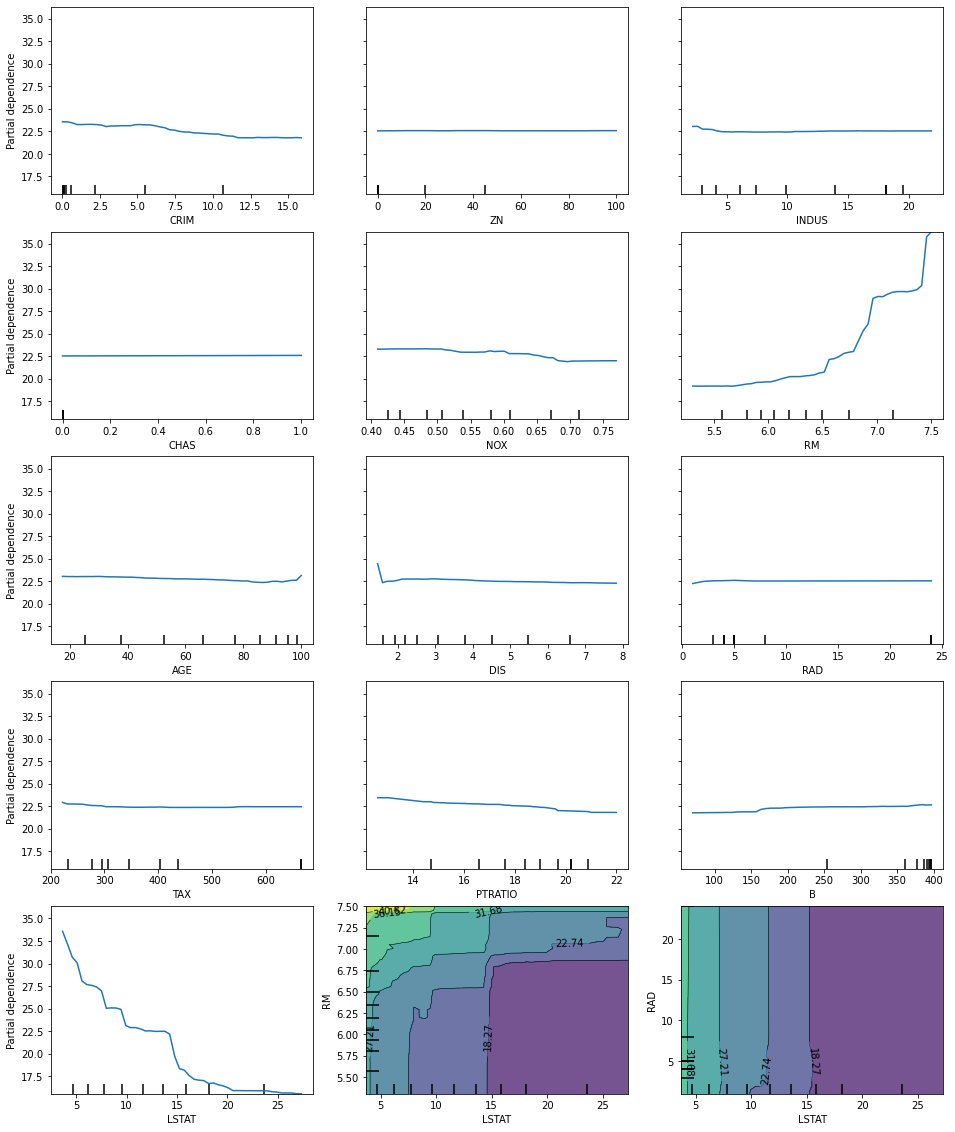

In [15]:
features = X.columns.tolist()
features.append(('LSTAT', 'RM'))
features.append(('LSTAT', 'RAD'))

fig = plt.figure(figsize=(16, 20))
plot_partial_dependence(reg_rf,
                        X_train,
                        features=features,
                        feature_names=features,
                        grid_resolution=50,
                        fig=fig)

Interpretacja PDP:

1. Zmienne LSTAT i RM uśredniając wywołują największe zmiany z warościach predykowanych przez model

2. Dla mapy konturowej LSTATvs.RM można zauważyć, że:
    * Predykcje dla domów o dużej liczbie pokoi są mniej zależne od zmiennej LSTAT
    * Domy położone w  lepszych dzielniach są wyceniane podobnie prez model i są mniej zależne od zmiennej RM

In [16]:
def sample_space(feature_values, feature_type, sample_resolution):
    # dla ziennych ciągłych
    if feature_type == 'cont':
        val_min = feature_values.min()
        val_max = feature_values.max()
        sampled_values = np.linspace(start=val_min, stop=val_max, num=sample_resolution)
    
    # dla zmiennych dyskretnych
    elif feature_type == 'dis':
        sampled_values = np.unique(feature_values, return_index=False)
    
    else:
        raise Exception('Wrong feature type')
    
    return sampled_values

In [17]:
sample_space(np.array([1, 2, 3, 4, 4, 3]), 'dis', 10)

array([1, 2, 3, 4])

In [18]:
a = np.array([[1, 2], 
              [3, 4], 
              [4, 3]])
a.shape

(3, 2)

In [19]:
a.reshape((-1, 1))

array([[1],
       [2],
       [3],
       [4],
       [4],
       [3]])

In [20]:
def pdp(model,
       X,
       feature_number,
       feature_name,
       feature_type,
       sample_resolution=100):
    
    # Stwórz siatkę wartości dla badanej zmiennej
    sampled_values = sample_space(feature_values=X[:, feature_number],
                                  feature_type=feature_type,
                                  sample_resolution=sample_resolution)
    
    # Korekta sample_resolution ze względu na możliwość ograniczenia długości 
    # wektora w przypadku zmiennej dyskretnej.
    sample_resolution = sampled_values.shape[0]
    
    # Stwórz pusty kontener na poszerzony zbiór próbek 
    stacked_instances = np.empty((0, X.shape[1]), float)
    
    # Stwórz macierz z pozostałymi zmiennymi
    other_features = np.delete(X, feature_number, axis=1)
    
    # Iteruj dla każdej próbki w pomniejszonym zbiorze danych:
    for i, row in enumerate(other_features):
        
        # Skopiuj wiersz sample_resolution-razy
        copied_instances = np.repeat(row.reshape((1, -1)),
                                    sample_resolution,
                                    axis=0)
        
        # Wstaw kolumnę z siatką wartości badanej zmiennej
        concat_instances = np.insert(copied_instances,
                                    feature_number,
                                    sampled_values.ravel(),
                                    axis=1)

        # Appenduj kontener
        stacked_instances = np.append(stacked_instances,
                                     concat_instances,
                                     axis=0)

    # Wykonaj predykcje dla całego powiększonego zbioru
    y_pred = model.predict(stacked_instances)
    
    # Stwórz dataframe'a z kolumną badanej zmiennej oraz odpowiadajaceymi jej predykcjami
    feature_results = pd.DataFrame({
        feature_name: stacked_instances[:, feature_number],
        'y': y_pred
    })
    
    # Dla każdej unikalnej wartości badanej zmiennej wylicz średnie predykcje
    mean_y = feature_results.groupby([feature_name]).mean()
    #std_y = feature_results.groupby([feature_name]).std()

    return mean_y

In [21]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [22]:
pdp_df = pdp(reg_rf, X.values, feature_number=5, feature_name="RM", feature_type='cont')

In [23]:
pdp_df.head()

,y
RM,
3.561000,19.760636
3.613717,19.760636
3.666434,19.760636
3.719152,19.760636
3.771869,19.760636


In [24]:
features_to_types = {
    'CRIM': 'cont',
    'ZN': 'cont',
    'INDUS': 'cont',
    'CHAS': 'dis', 
    'NOX': 'cont', 
    'RM': 'cont', 
    'AGE': 'cont', 
    'DIS': 'cont', 
    'RAD': 'cont', 
    'TAX': 'cont', 
    'PTRATIO': 'cont', 
    'B': 'cont', 
    'LSTAT': 'cont'
}

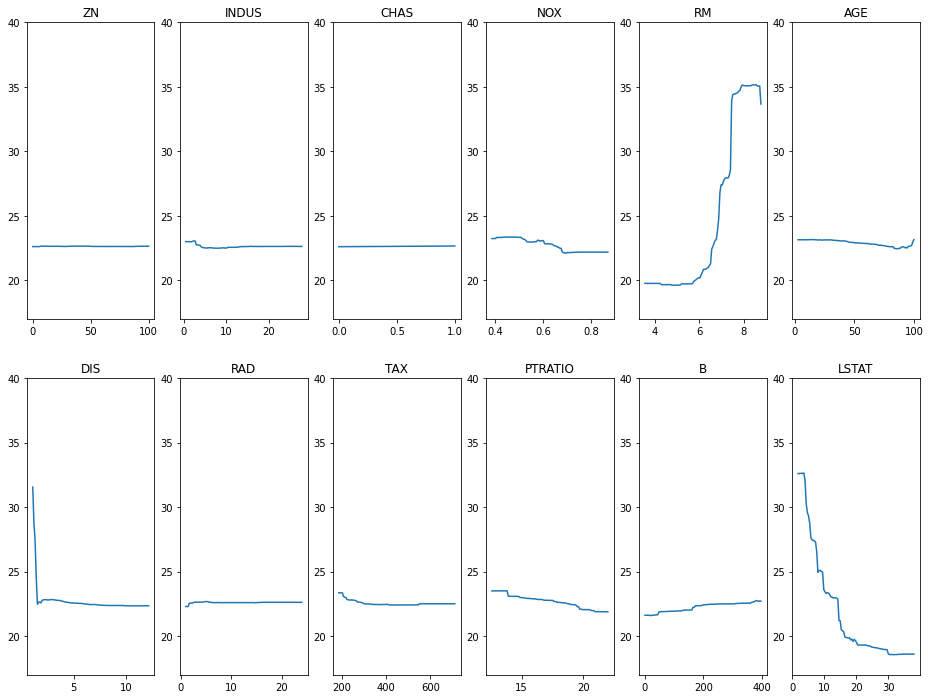

In [25]:
plt.figure(figsize=(16, 12))

for i in range(1, 13):
    plt.subplot(2, 6, i)
    
    feature_name=X.columns[i]
    
    pdp_df = pdp(reg_rf, 
                 X.values,
                 feature_number=i,
                 feature_name=feature_name,
                 feature_type=features_to_types[feature_name],
                 sample_resolution=100)
    
    plt.ylim(17, 40)
    plt.plot(pdp_df.index, pdp_df.y)
    plt.title(feature_name)

In [26]:
X.CHAS.unique()

array([0., 1.])

## 1.2. ICE  Plot - Individual Conditional Expectation Plot 

https://christophm.github.io/interpretable-ml-book/ice.html

Brak implementacji w scikit-learnie.

#### Zadanie

Zaimplementuj swoją funkcję do określania ICE Plots. 

Dla jasności załóżmy, że mamy m próbek w zbiorze danych.

1. Pozyskaj nauczony model na którym będziesz przeprowadzał predykcje oraz numer/nazwę zmiennej V, dla której będzie wyliczany PDP.
2. Zbuduj s-elementową siatkę wartości dla zmiennej, którą badasz. 
2. Dla każdej próbki w m-elementowym zbiorze (lub dla n wylosowanych spośród wszystkich próbek):

    2.1. Zamień wartość zmiennej V na przygotowaną siatkę, tworząc tym samym s póbek, różniących się jedynie wartością zmiennej V. 
    
    2.2. Wykonaj predykcję dla każdej próbki, uzyskując s-elementowy wektor y_pred.
    
    2.3. Zapisz wyniki predykcji.
    
3. Wyświetl wszystkie m krzywych (pojedyncza krzywa jest złożona z rozszerzonej przez siatkę jednej badanej próbki)

In [27]:
def ice(model,
       X,
       feature_number,
       feature_name,
       feature_type,
       sample_resolution=100):
    
    # Stwórz siatkę wartości dla badanej zmiennej
    sampled_values = sample_space(feature_values=X[:, feature_number],
                                  feature_type=feature_type,
                                  sample_resolution=sample_resolution)
    
    # Korekta sample_resolution ze względu na możliwość ograniczenia długości 
    # wektora w przypadku zmiennej dyskretnej.
    sample_resolution = sampled_values.shape[0]
    
    # Stwórz pusty kontener na poszerzony zbiór próbek 
    stacked_instances = np.empty((0, X.shape[1]), float)
    
    # stwórz kontener przechowujący informacje, z której próbki pochodzi wiersz w stacked_instances
    row_indicators = []
    
    # Stwórz macierz z pozostałymi zmiennymi
    other_features = np.delete(X, feature_number, axis=1)
    
    # Iteruj dla każdej próbki w pomniejszonym zbiorze danych:
    for i, row in enumerate(other_features):
        
        # Skopiuj wiersz sample_resolution-razy
        copied_instances = np.repeat(row.reshape((1, -1)),
                                    sample_resolution,
                                    axis=0)
        
        # Wstaw kolumnę z siatką wartości badanej zmiennej
        concat_instances = np.insert(copied_instances,
                                    feature_number,
                                    sampled_values.ravel(),
                                    axis=1)

        # Appenduj kontener
        stacked_instances = np.append(stacked_instances,
                                     concat_instances,
                                     axis=0)
        
        # Dołącz do listy indeksy przetwarzanej próbki
        row_indicators += (np.ones(sample_resolution) * i).ravel().tolist()

    # Wykonaj predykcje dla całego powiększonego zbioru
    y_pred = model.predict(stacked_instances)
    
    # Stwórz dataframe'a z kolumną badanej zmiennej oraz odpowiadajaceymi jej predykcjami
    feature_results = pd.DataFrame({
        feature_name: stacked_instances[:, feature_number],
        'y': y_pred,
        'row_id': row_indicators
    })
    
    # Stwórz dataframe'a z kolumną zawierającą siatkę wartości badanej zmiennej i ustaw ją jako indeks
    samples_groups_df = pd.DataFrame({
        feature_name: sampled_values
    })
    samples_groups_df.set_index(feature_name, drop=True, inplace=True)
    
    # dla każdej z oryginalnych próbek:
    for slice_num in range(X.shape[0]):
        samples_groups_df[str(slice_num)] = feature_results[feature_results['row_id'] == slice_num]['y'].values

    return samples_groups_df

In [28]:
ice_df = ice(reg_rf, X.values, feature_number=5, feature_name="RM", feature_type='cont')

In [29]:
ice_df.mean(1)

RM
3.561000    19.760636
3.613717    19.760636
3.666434    19.760636
3.719152    19.760636
3.771869    19.760636
              ...    
8.569131    35.167913
8.621848    35.067097
8.674566    35.067097
8.727283    35.067097
8.780000    33.675146
Length: 100, dtype: float64

<AxesSubplot:xlabel='RM'>

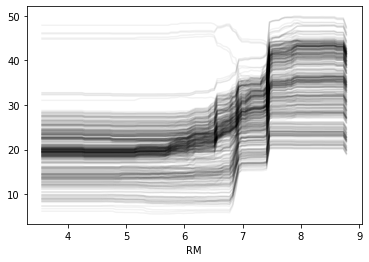

In [30]:
ice_df.plot(alpha=0.05, color='k', legend=False)

<AxesSubplot:xlabel='RM'>

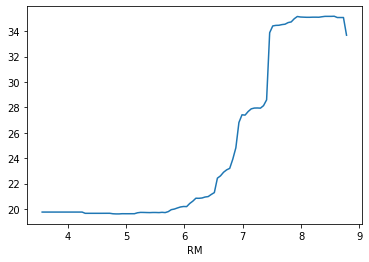

In [31]:
ice_df.mean(1).plot()

<AxesSubplot:xlabel='RM'>

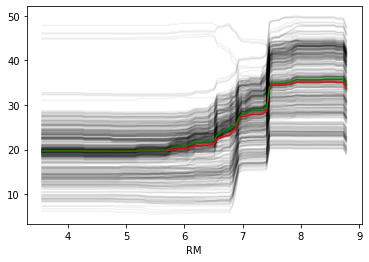

In [32]:
ice_df.plot(alpha=0.05, color='k', legend=False)
ice_df.mean(1).plot(color='red')
ice_df.median(1).plot(color='green')

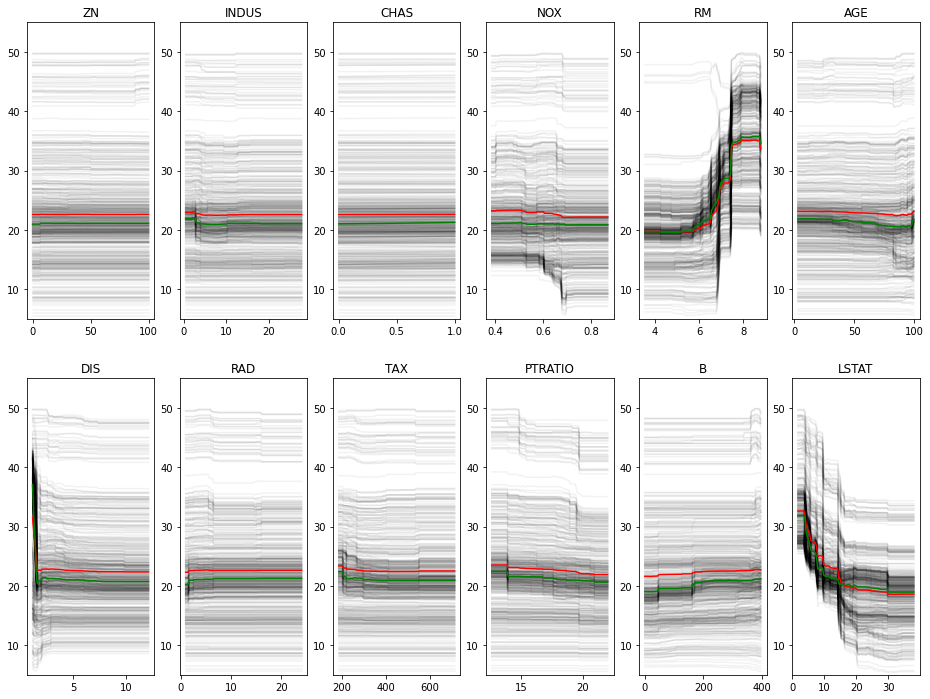

In [33]:
plt.figure(figsize=(16, 12))

for i in range(1, 13):
    plt.subplot(2, 6, i)
    
    feature_name=X.columns[i]
    
    ice_df = ice(reg_rf, 
                 X.values,
                 feature_number=i,
                 feature_name=feature_name,
                 feature_type=features_to_types[feature_name],
                 sample_resolution=100)
    
    plt.ylim(5, 55)
    plt.plot(ice_df.index, ice_df.values, alpha=0.05, color='k')
    plt.plot(ice_df.index, ice_df.mean(1), color='red')
    plt.plot(ice_df.index, ice_df.median(1), color='green')
    plt.title(feature_name)

## 1.4. Permutation Feature Importance

https://christophm.github.io/interpretable-ml-book/feature-importance.html

Zaimplementowane dopiero w sklearn 0.22.

In [34]:
import sklearn
sklearn.__version__

'0.23.2'

#### Zadanie

Zaimplementuj swoją funkcję do określania permutation feature importance.

Logika metody:
1. Wylicz błąd predykcji dla całego zbioru danych (dla wszystkihc zmiennych).
2. Dla każdej kolumny w zmiennych objaśniających:
    
    2.1. Dla jednej zmiennej wykonaj k-krotnie:
        2.1.1. Permutuj wartości i-tej zmiennej, zwyrając zależność między ocenianą zmienną a targetem.
        2.1.2. Wykonaj predykcję.
        2.1.3. Oblicz błąd predykcji i dodaj go do puli błędów.
        2.1.4. Oblicz względny przyrost błędu i dodaj go do puli przyrostów dla i-tej zmiennej.
3. Narysuj wykres pudełkowy opisujący rozkłady przyrostów błędów dla każdej zmiennej.

In [35]:
def pfi(model, X, y, feature_number, error_func, permut_number=100):
    
    # wylicz oryginalne predykcje
    y_pred = model.predict(X)
    
    # wyznacz błąð na oryginalnych danych
    error = error_func(y.ravel(), y_pred.ravel())
    
    # stwórz kontener na błędy predykcji
    scores = []
    
    for i in  range(permut_number):
        # skopiuj zbiór X
        X_shuff = X.copy()
        
        # permutuj wartości wybranej zmiennej
        X_shuff[:, feature_number] = np.random.permutation(X_shuff[:, feature_number])
        
        # wyznacz błąd predykcji
        score = error_func(y.ravel(), model.predict(X_shuff).ravel())
        scores.append(score)
    
    # wylicz względny błąd
    importances = (np.array(scores) - error) / error
    
    return importances

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [37]:
pfi_arr = pfi(reg_rf,
              X_train.values,
              y_train,
              feature_number=5,
              error_func=mean_squared_error,
              permut_number=1000)

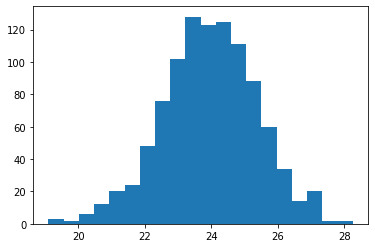

In [38]:
_ = plt.hist(pfi_arr, bins=20)

In [39]:
pfi_arr.mean()

23.954684361085526

In [40]:
permut_number = 100

In [41]:
pfi_all = np.zeros((permut_number, X.shape[1]))

for i, col in enumerate(X.columns):
    print(col)
    pfi_all[:, i] = pfi(reg_rf,
                        X_train.values,
                        y_train,
                        feature_number=i,
                        error_func=mean_squared_error,
                        permut_number=permut_number)
    
pfi_df = pd.DataFrame(pfi_all, columns=X.columns)

CRIM
ZN
INDUS
CHAS
NOX
RM
AGE
DIS
RAD
TAX
PTRATIO
B
LSTAT


In [42]:
pfi_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,3.364468,0.037658,0.362045,0.013479,1.871240,24.088222,0.620922,5.307955,0.222388,0.368395,1.003581,0.583682,36.421437
1,3.495395,0.039455,0.380652,0.021076,2.343571,25.014314,0.769585,5.382373,0.260770,0.358580,1.050520,0.595913,39.386041
2,3.683461,0.044428,0.295612,0.017349,2.010691,23.636452,0.780903,5.839602,0.251406,0.400610,1.136649,0.582771,35.053662
3,3.503246,0.048348,0.371677,0.019920,2.244432,23.802030,0.631313,5.625774,0.242678,0.436464,0.900235,0.567151,31.249372
4,3.427002,0.029032,0.336714,0.016581,2.218706,24.546412,0.700341,4.770964,0.249565,0.437550,1.038511,0.626151,40.631560


Text(0.5, 1.0, 'Permutation importance')

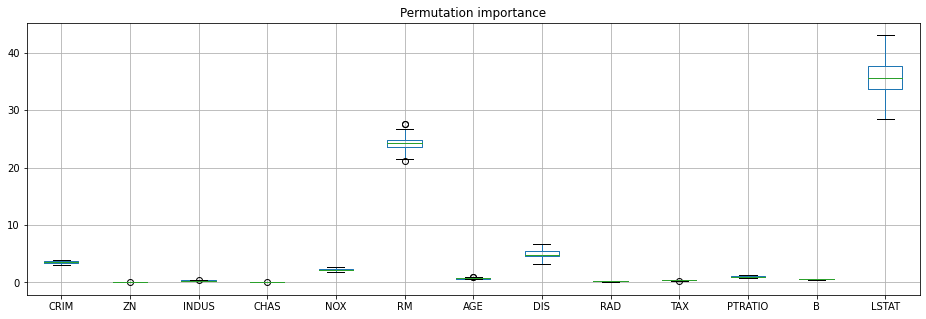

In [43]:
pfi_df.boxplot(figsize=(16, 5))
plt.title('Permutation importance')

In [44]:
pfi_df_normalized = pfi_df.mean() / pfi_df.mean().sum()
pfi_df_normalized

CRIM       0.047249
ZN         0.000553
INDUS      0.004465
CHAS       0.000243
NOX        0.030121
RM         0.326408
AGE        0.010088
DIS        0.067023
RAD        0.003312
TAX        0.005089
PTRATIO    0.013572
B          0.007943
LSTAT      0.483934
dtype: float64

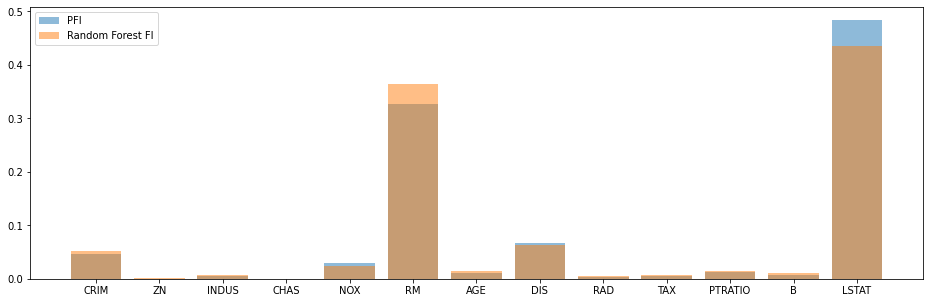

In [45]:
plt.figure(figsize=(16, 5))
plt.bar(X.columns, pfi_df_normalized.values.ravel(), alpha=0.5, label='PFI')
plt.bar(X.columns, reg_rf.feature_importances_, alpha=0.5, label='Random Forest FI')
plt.legend()

# 2. Predykcja szeregów czasowych

In [46]:
dataset = pd.read_csv('Dane/dataset_PSE.csv')

In [47]:
dataset

,indeks,Data,Godzina,ZAP
0,2,20160101,3,13841.413
1,3,20160101,4,13375.913
2,4,20160101,5,13163.563
3,5,20160101,6,13132.988
4,6,20160101,7,13185.875
...,...,...,...,...
19664,19698,20180331,20,18069.175
19665,19699,20180331,21,18219.463
19666,19700,20180331,22,17424.750
19667,19701,20180331,23,16545.325


In [48]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19669 entries, 0 to 19668
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   indeks   19669 non-null  int64  
 1   Data     19669 non-null  int64  
 2   Godzina  19669 non-null  int64  
 3   ZAP      19669 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 614.8 KB


<AxesSubplot:>

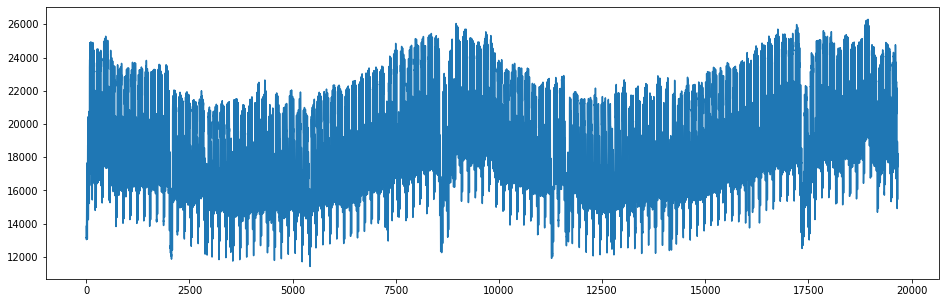

In [49]:
dataset['ZAP'].plot(figsize=(16, 5))

Zmieniamy format dat na pd.Timestamp

In [50]:
dataset.Godzina.unique()

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24,  1,  2], dtype=int64)

In [51]:
# przesuwamy o godzinę w tył
dataset.Godzina = dataset.Godzina - 1

In [52]:
from datetime import datetime

In [53]:
datetime.strptime('201803313', '%Y%m%d%H')

datetime.datetime(2018, 3, 31, 3, 0)

In [54]:
dataset['Czas'] = dataset['Data'].astype(str) + dataset['Godzina'].astype(str)
dataset

,indeks,Data,Godzina,ZAP,Czas
0,2,20160101,2,13841.413,201601012
1,3,20160101,3,13375.913,201601013
2,4,20160101,4,13163.563,201601014
3,5,20160101,5,13132.988,201601015
4,6,20160101,6,13185.875,201601016
...,...,...,...,...,...
19664,19698,20180331,19,18069.175,2018033119
19665,19699,20180331,20,18219.463,2018033120
19666,19700,20180331,21,17424.750,2018033121
19667,19701,20180331,22,16545.325,2018033122


In [55]:
dataset.set_index(pd.to_datetime(dataset['Czas'], format='%Y%m%d%H'), inplace=True)

In [56]:
dataset

,indeks,Data,Godzina,ZAP,Czas
Czas,,,,,
2016-01-01 02:00:00,2,20160101,2,13841.413,201601012
2016-01-01 03:00:00,3,20160101,3,13375.913,201601013
2016-01-01 04:00:00,4,20160101,4,13163.563,201601014
2016-01-01 05:00:00,5,20160101,5,13132.988,201601015
2016-01-01 06:00:00,6,20160101,6,13185.875,201601016
...,...,...,...,...,...
2018-03-31 19:00:00,19698,20180331,19,18069.175,2018033119
2018-03-31 20:00:00,19699,20180331,20,18219.463,2018033120
2018-03-31 21:00:00,19700,20180331,21,17424.750,2018033121


In [57]:
consumption = dataset[['ZAP']]
consumption.head()

,ZAP
Czas,
2016-01-01 02:00:00,13841.413
2016-01-01 03:00:00,13375.913
2016-01-01 04:00:00,13163.563
2016-01-01 05:00:00,13132.988
2016-01-01 06:00:00,13185.875


## EDA

<AxesSubplot:xlabel='Czas'>

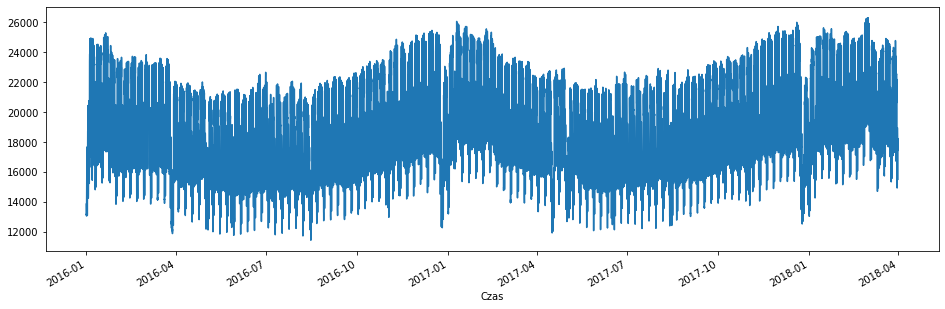

In [58]:
consumption['ZAP'].plot(figsize=(16, 5))

<AxesSubplot:xlabel='Czas'>

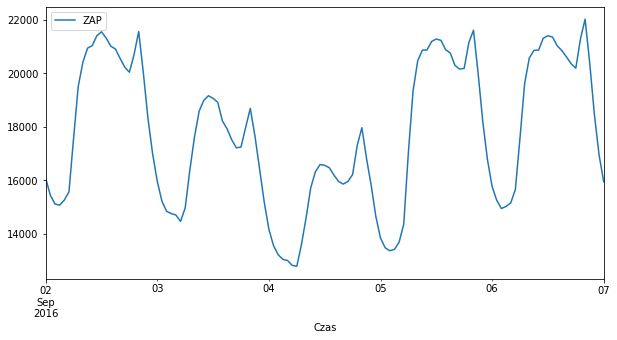

In [59]:
consumption['2016-09-02 00:00:00': '2016-09-07 00:00:00'].plot(figsize=(10, 5))

In [60]:
mean_day = consumption.groupby(consumption.index.hour).mean()
mean_day

,ZAP
Czas,
0,16368.971424
1,15770.011145
2,15435.257617
3,15396.782193
4,15470.840888
5,15853.205510
6,17666.202440
7,19309.357774
8,20362.721055


Text(0.5, 1.0, 'Standardowy dzień')

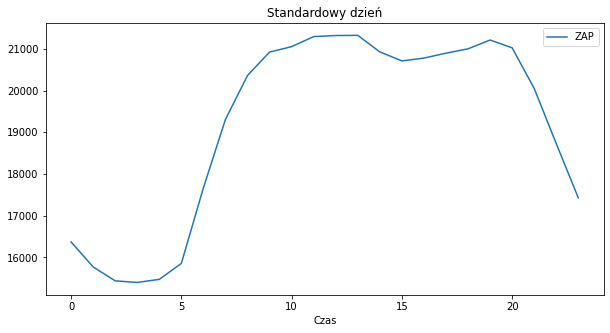

In [61]:
mean_day.plot(figsize=(10, 5))
plt.title('Standardowy dzień')

In [62]:
consumption.isna().sum()

ZAP    0
dtype: int64

In [63]:
consumption = consumption.asfreq(freq='1H')

In [64]:
consumption.isna().sum()

ZAP    33
dtype: int64

In [65]:
consumption[consumption['ZAP'].isna() == True]

,ZAP
Czas,
2016-03-03 12:00:00,NaN
2016-03-03 13:00:00,NaN
2016-03-03 14:00:00,NaN
2016-03-03 15:00:00,NaN
2016-03-03 16:00:00,NaN
2016-03-03 17:00:00,NaN
2016-03-03 18:00:00,NaN
2016-03-03 19:00:00,NaN
2016-03-03 20:00:00,NaN


<AxesSubplot:xlabel='Czas'>

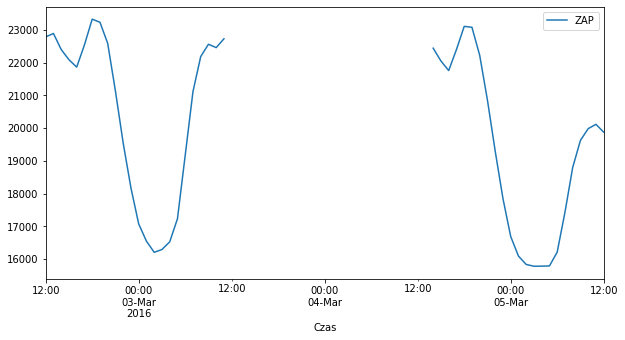

In [66]:
consumption['2016-03-02 12:00:00': '2016-03-05 12:00:00'].plot(figsize=(10, 5))

#### Zadanie
1. Uzupełnij brakujący dzień dniem 'statystycznym'
2. Uzupełnij brakujące pojedyncze wartości interpolacją liniową

In [67]:
#consumption.interpolate('linear', inplace=True)

In [68]:
mean_day_map = mean_day['ZAP'].to_dict()
mean_day_map

{0: 16368.971424205361,
 1: 15770.01114460781,
 2: 15435.257617073154,
 3: 15396.782192682911,
 4: 15470.840887804861,
 5: 15853.205509756095,
 6: 17666.202440243906,
 7: 19309.357774390228,
 8: 20362.72105487803,
 9: 20924.688051219495,
 10: 21055.35640365853,
 11: 21296.20915853658,
 12: 21322.295300733513,
 13: 21326.24043711844,
 14: 20928.958936585354,
 15: 20713.011151219504,
 16: 20780.67039316239,
 17: 20898.55025121948,
 18: 21003.165187804836,
 19: 21213.725391463402,
 20: 21025.775187804844,
 21: 20050.839595121935,
 22: 18726.481499389454,
 23: 17424.693808536576}

In [69]:
empty_timestamps = consumption[consumption['ZAP'].isna() == True]. index
empty_timestamps[:-7]

DatetimeIndex(['2016-03-03 12:00:00', '2016-03-03 13:00:00',
               '2016-03-03 14:00:00', '2016-03-03 15:00:00',
               '2016-03-03 16:00:00', '2016-03-03 17:00:00',
               '2016-03-03 18:00:00', '2016-03-03 19:00:00',
               '2016-03-03 20:00:00', '2016-03-03 21:00:00',
               '2016-03-03 22:00:00', '2016-03-03 23:00:00',
               '2016-03-04 00:00:00', '2016-03-04 01:00:00',
               '2016-03-04 02:00:00', '2016-03-04 03:00:00',
               '2016-03-04 04:00:00', '2016-03-04 05:00:00',
               '2016-03-04 06:00:00', '2016-03-04 07:00:00',
               '2016-03-04 08:00:00', '2016-03-04 09:00:00',
               '2016-03-04 10:00:00', '2016-03-04 11:00:00',
               '2016-03-04 12:00:00', '2016-03-04 13:00:00'],
              dtype='datetime64[ns]', name='Czas', freq=None)

In [71]:
vals_to_replace = consumption.index.to_series().apply(lambda idx: mean_day_map[idx.hour])

vals_to_replace = vals_to_replace[empty_timestamps[:-7]]
vals_to_replace

Czas
2016-03-03 12:00:00    21322.295301
2016-03-03 13:00:00    21326.240437
2016-03-03 14:00:00    20928.958937
2016-03-03 15:00:00    20713.011151
2016-03-03 16:00:00    20780.670393
2016-03-03 17:00:00    20898.550251
2016-03-03 18:00:00    21003.165188
2016-03-03 19:00:00    21213.725391
2016-03-03 20:00:00    21025.775188
2016-03-03 21:00:00    20050.839595
2016-03-03 22:00:00    18726.481499
2016-03-03 23:00:00    17424.693809
2016-03-04 00:00:00    16368.971424
2016-03-04 01:00:00    15770.011145
2016-03-04 02:00:00    15435.257617
2016-03-04 03:00:00    15396.782193
2016-03-04 04:00:00    15470.840888
2016-03-04 05:00:00    15853.205510
2016-03-04 06:00:00    17666.202440
2016-03-04 07:00:00    19309.357774
2016-03-04 08:00:00    20362.721055
2016-03-04 09:00:00    20924.688051
2016-03-04 10:00:00    21055.356404
2016-03-04 11:00:00    21296.209159
2016-03-04 12:00:00    21322.295301
2016-03-04 13:00:00    21326.240437
Name: Czas, dtype: float64

In [ ]:
consumption['ZAP'][empty_timestamps]

##### Walidacja krzyżowa dla szeregów czasowych

<img src="Grafika/tscv.png">

<br>

<br>

<br>
Źródło: 

https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html#sphx-glr-auto-examples-model-selection-plot-cv-indices-py

In [ ]:
from sklearn.model_selection 